Data is provided from: https://www.kaggle.com/datasets/sahilnbajaj/cancer-classification

# Faze1

Loading data and preprocessing.

In [87]:
#Importing needed modules.

from pandas import read_csv , DataFrame
from matplotlib.pyplot import pie , show , title , figure 
from pickle import dump
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier , BaggingClassifier , ExtraTreesClassifier ,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

#Instancing from 'StandardScaler' object.

scaler = StandardScaler()

In [88]:
#Loading data

path = "D:\\datasets\\cancer_classification\\cancer_classification.csv"
file = read_csv(path)
df = file.copy()
df.sample(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
154,13.150,15.34,85.31,538.9,0.09384,0.08498,0.09293,0.034830,0.1822,0.06207,...,20.50,97.67,677.3,0.1478,0.2256,0.30090,0.09722,0.3849,0.08633,1
498,18.490,17.52,121.30,1068.0,0.10120,0.13170,0.14910,0.091830,0.1832,0.06697,...,22.88,146.40,1600.0,0.1412,0.3089,0.35330,0.16630,0.2510,0.09445,0
467,9.668,18.10,61.06,286.3,0.08311,0.05428,0.01479,0.005769,0.1680,0.06412,...,24.62,71.11,380.2,0.1388,0.1255,0.06409,0.02500,0.3057,0.07875,1
109,11.340,21.26,72.48,396.5,0.08759,0.06575,0.05133,0.018990,0.1487,0.06529,...,29.15,83.99,518.1,0.1699,0.2196,0.31200,0.08278,0.2829,0.08832,1
385,14.600,23.29,93.97,664.7,0.08682,0.06636,0.08390,0.052710,0.1627,0.05416,...,31.71,102.20,758.2,0.1312,0.1581,0.26750,0.13590,0.2477,0.06836,0
514,15.050,19.07,97.26,701.9,0.09215,0.08597,0.07486,0.043350,0.1561,0.05915,...,28.06,113.80,967.0,0.1246,0.2101,0.28660,0.11200,0.2282,0.06954,0
331,12.980,19.35,84.52,514.0,0.09579,0.11250,0.07107,0.029500,0.1761,0.06540,...,21.95,99.21,634.3,0.1288,0.3253,0.34390,0.09858,0.3596,0.09166,1
163,12.340,22.22,79.85,464.5,0.10120,0.10150,0.05370,0.028220,0.1551,0.06761,...,28.68,87.36,553.0,0.1452,0.2338,0.16880,0.08194,0.2268,0.09082,1
358,8.878,15.49,56.74,241.0,0.08293,0.07698,0.04721,0.023810,0.1930,0.06621,...,17.70,65.27,302.0,0.1015,0.1248,0.09441,0.04762,0.2434,0.07431,1
41,10.950,21.35,71.90,371.1,0.12270,0.12180,0.10440,0.056690,0.1895,0.06870,...,35.34,87.22,514.0,0.1909,0.2698,0.40230,0.14240,0.2964,0.09606,0


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [90]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

There are no null data.

In [91]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


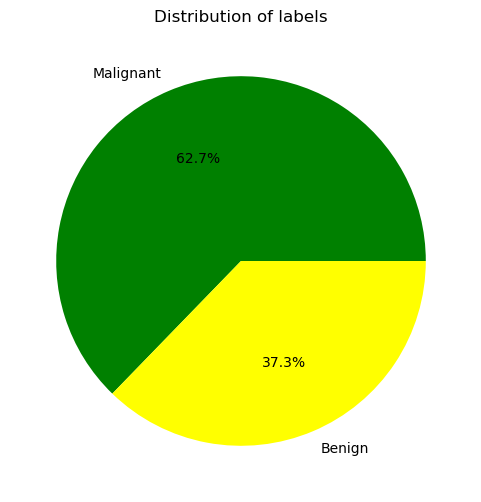

In [92]:
figure(figsize=(6,6))
pie(df.benign_0__mal_1.value_counts().values,
    labels=['Malignant','Benign'],
    colors=['green','yellow'],
    autopct='%1.1f%%')
title('Distribution of labels')
show()

In [93]:
label = df.benign_0__mal_1
df = df.drop(['benign_0__mal_1'],axis=1)

In [94]:
#Scaling features.

scaled_df = scaler.fit_transform(df)

In [95]:
#Splitting scaled features into train and test sets.

xtr , xts , ytr , yts = train_test_split(scaled_df,label,test_size=0.1,random_state=0)
print(f'Train size(90% of data): {len(xtr)}\nTest size(10% of data): {len(xts)}')

Train size(90% of data): 512
Test size(10% of data): 57


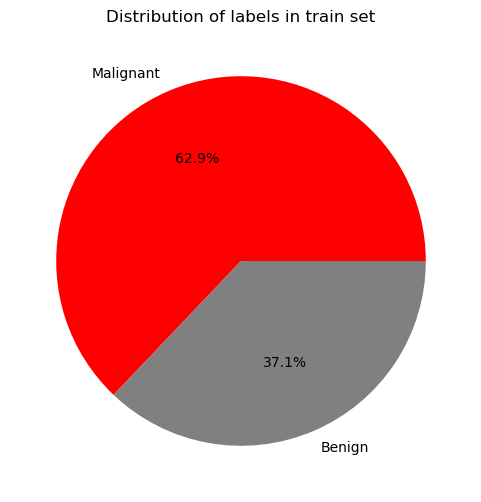

In [96]:
figure(figsize=(6,6))
pie([ytr.tolist().count(1),ytr.tolist().count(0)],
    labels=['Malignant','Benign'],
    colors=['red','gray'],
    autopct='%1.1f%%')
title('Distribution of labels in train set')
show()

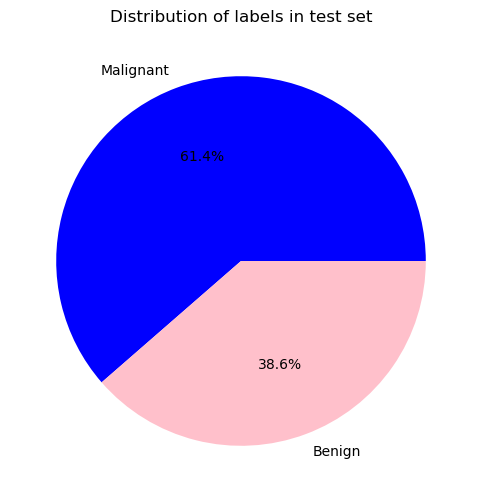

In [97]:
figure(figsize=(6,6))
pie([yts.tolist().count(1),yts.tolist().count(0)],
    labels=['Malignant','Benign'],
    colors=['blue','pink'],
    autopct='%1.1f%%')
title('Distribution of labels in test set')
show()

# Faze2

Modeling and evaluating.

In [98]:
#Making a list from various models.

models = [DecisionTreeClassifier,
          KNeighborsClassifier,
          RandomForestClassifier ,
          BaggingClassifier ,
          ExtraTreesClassifier ,
          GradientBoostingClassifier,
          LogisticRegression,
          XGBClassifier,
          CatBoostClassifier]
result = list()
cons = list()
for model in models:
    
    #Fitting and evaluating each model on train set. 
    
    alg = model()
    alg.fit(xtr,ytr)
    train_score = alg.score(xtr,ytr)*100
    
    #evaluating each model on test set.
    
    test_score = alg.score(xts,yts)*100
    
    #Fitting and evaluating each model on total data.
    
    alg.fit(scaled_df,label)
    total_score = alg.score(scaled_df,label)*100
    
    #Saving scores in a list.
    
    result.append([str(model).split('.')[-1][:-2],
                   train_score,
                   test_score,
                   train_score-test_score,
                   total_score])
    
    #Saving confusion matrix of each model in a list.
    
    pred = alg.predict(scaled_df)
    cons.append(confusion_matrix(label,pred))
    
    #Saving the model in the main path.
    
    with open(f'D:\\datasets\\cancer_classification\\model_{str(model).split(".")[-1][:-2]}.pkl','wb') as file:
        dump(alg,file)

Learning rate set to 0.007741
0:	learn: 0.6803492	total: 5.51ms	remaining: 5.5s
1:	learn: 0.6675025	total: 10.7ms	remaining: 5.32s
2:	learn: 0.6534064	total: 15.2ms	remaining: 5.06s
3:	learn: 0.6416463	total: 20.2ms	remaining: 5.04s
4:	learn: 0.6284199	total: 24.9ms	remaining: 4.95s
5:	learn: 0.6184626	total: 29.6ms	remaining: 4.91s
6:	learn: 0.6065682	total: 34.1ms	remaining: 4.83s
7:	learn: 0.5950598	total: 38.7ms	remaining: 4.79s
8:	learn: 0.5843210	total: 43.3ms	remaining: 4.76s
9:	learn: 0.5744364	total: 47.8ms	remaining: 4.73s
10:	learn: 0.5658854	total: 52.5ms	remaining: 4.72s
11:	learn: 0.5552092	total: 57.1ms	remaining: 4.7s
12:	learn: 0.5456846	total: 61.6ms	remaining: 4.68s
13:	learn: 0.5380384	total: 66.4ms	remaining: 4.67s
14:	learn: 0.5292168	total: 70.9ms	remaining: 4.66s
15:	learn: 0.5206708	total: 75.5ms	remaining: 4.64s
16:	learn: 0.5129927	total: 80.1ms	remaining: 4.63s
17:	learn: 0.5048008	total: 84.6ms	remaining: 4.62s
18:	learn: 0.4972132	total: 89.2ms	remaining: 

160:	learn: 0.1034465	total: 788ms	remaining: 4.11s
161:	learn: 0.1028647	total: 794ms	remaining: 4.11s
162:	learn: 0.1022651	total: 800ms	remaining: 4.11s
163:	learn: 0.1015143	total: 806ms	remaining: 4.11s
164:	learn: 0.1007731	total: 812ms	remaining: 4.11s
165:	learn: 0.1001276	total: 817ms	remaining: 4.11s
166:	learn: 0.0994302	total: 823ms	remaining: 4.1s
167:	learn: 0.0988279	total: 830ms	remaining: 4.11s
168:	learn: 0.0982516	total: 835ms	remaining: 4.11s
169:	learn: 0.0975627	total: 839ms	remaining: 4.1s
170:	learn: 0.0971144	total: 844ms	remaining: 4.09s
171:	learn: 0.0963929	total: 849ms	remaining: 4.08s
172:	learn: 0.0958099	total: 853ms	remaining: 4.08s
173:	learn: 0.0952427	total: 858ms	remaining: 4.07s
174:	learn: 0.0947150	total: 862ms	remaining: 4.06s
175:	learn: 0.0939717	total: 866ms	remaining: 4.05s
176:	learn: 0.0933986	total: 870ms	remaining: 4.05s
177:	learn: 0.0926728	total: 875ms	remaining: 4.04s
178:	learn: 0.0921208	total: 879ms	remaining: 4.03s
179:	learn: 0.

375:	learn: 0.0386955	total: 1.58s	remaining: 2.62s
376:	learn: 0.0385616	total: 1.58s	remaining: 2.62s
377:	learn: 0.0384462	total: 1.59s	remaining: 2.61s
378:	learn: 0.0383597	total: 1.59s	remaining: 2.6s
379:	learn: 0.0382407	total: 1.59s	remaining: 2.6s
380:	learn: 0.0381095	total: 1.59s	remaining: 2.59s
381:	learn: 0.0380157	total: 1.6s	remaining: 2.58s
382:	learn: 0.0379318	total: 1.6s	remaining: 2.58s
383:	learn: 0.0377863	total: 1.6s	remaining: 2.57s
384:	learn: 0.0376783	total: 1.61s	remaining: 2.56s
385:	learn: 0.0375018	total: 1.61s	remaining: 2.56s
386:	learn: 0.0373997	total: 1.61s	remaining: 2.55s
387:	learn: 0.0372995	total: 1.61s	remaining: 2.55s
388:	learn: 0.0372141	total: 1.62s	remaining: 2.54s
389:	learn: 0.0371949	total: 1.62s	remaining: 2.53s
390:	learn: 0.0370969	total: 1.62s	remaining: 2.53s
391:	learn: 0.0369513	total: 1.63s	remaining: 2.52s
392:	learn: 0.0368444	total: 1.63s	remaining: 2.51s
393:	learn: 0.0367152	total: 1.63s	remaining: 2.51s
394:	learn: 0.036

550:	learn: 0.0238574	total: 1.97s	remaining: 1.61s
551:	learn: 0.0238019	total: 1.97s	remaining: 1.6s
552:	learn: 0.0237923	total: 1.98s	remaining: 1.6s
553:	learn: 0.0237542	total: 1.98s	remaining: 1.59s
554:	learn: 0.0236869	total: 1.98s	remaining: 1.59s
555:	learn: 0.0236680	total: 1.98s	remaining: 1.58s
556:	learn: 0.0236048	total: 1.99s	remaining: 1.58s
557:	learn: 0.0235520	total: 1.99s	remaining: 1.57s
558:	learn: 0.0234916	total: 1.99s	remaining: 1.57s
559:	learn: 0.0234550	total: 1.99s	remaining: 1.57s
560:	learn: 0.0233943	total: 2s	remaining: 1.56s
561:	learn: 0.0233129	total: 2s	remaining: 1.56s
562:	learn: 0.0232644	total: 2s	remaining: 1.55s
563:	learn: 0.0231822	total: 2s	remaining: 1.55s
564:	learn: 0.0230998	total: 2s	remaining: 1.54s
565:	learn: 0.0230453	total: 2.01s	remaining: 1.54s
566:	learn: 0.0229770	total: 2.01s	remaining: 1.53s
567:	learn: 0.0229385	total: 2.01s	remaining: 1.53s
568:	learn: 0.0228851	total: 2.01s	remaining: 1.52s
569:	learn: 0.0228378	total: 

732:	learn: 0.0161923	total: 2.37s	remaining: 862ms
733:	learn: 0.0161840	total: 2.37s	remaining: 859ms
734:	learn: 0.0161487	total: 2.37s	remaining: 855ms
735:	learn: 0.0161121	total: 2.37s	remaining: 852ms
736:	learn: 0.0160758	total: 2.38s	remaining: 848ms
737:	learn: 0.0160496	total: 2.38s	remaining: 844ms
738:	learn: 0.0160159	total: 2.38s	remaining: 841ms
739:	learn: 0.0159927	total: 2.38s	remaining: 837ms
740:	learn: 0.0159731	total: 2.38s	remaining: 834ms
741:	learn: 0.0159405	total: 2.39s	remaining: 830ms
742:	learn: 0.0159103	total: 2.39s	remaining: 827ms
743:	learn: 0.0158857	total: 2.39s	remaining: 823ms
744:	learn: 0.0158444	total: 2.39s	remaining: 820ms
745:	learn: 0.0158109	total: 2.4s	remaining: 816ms
746:	learn: 0.0158024	total: 2.4s	remaining: 812ms
747:	learn: 0.0157684	total: 2.4s	remaining: 809ms
748:	learn: 0.0157397	total: 2.4s	remaining: 805ms
749:	learn: 0.0157144	total: 2.4s	remaining: 802ms
750:	learn: 0.0156835	total: 2.41s	remaining: 798ms
751:	learn: 0.015

914:	learn: 0.0119925	total: 2.76s	remaining: 256ms
915:	learn: 0.0119911	total: 2.76s	remaining: 253ms
916:	learn: 0.0119883	total: 2.77s	remaining: 250ms
917:	learn: 0.0119820	total: 2.77s	remaining: 247ms
918:	learn: 0.0119807	total: 2.77s	remaining: 244ms
919:	learn: 0.0119725	total: 2.77s	remaining: 241ms
920:	learn: 0.0119510	total: 2.78s	remaining: 238ms
921:	learn: 0.0119448	total: 2.78s	remaining: 235ms
922:	learn: 0.0119276	total: 2.78s	remaining: 232ms
923:	learn: 0.0119063	total: 2.78s	remaining: 229ms
924:	learn: 0.0118746	total: 2.79s	remaining: 226ms
925:	learn: 0.0118479	total: 2.79s	remaining: 223ms
926:	learn: 0.0118202	total: 2.79s	remaining: 220ms
927:	learn: 0.0118046	total: 2.79s	remaining: 217ms
928:	learn: 0.0117861	total: 2.79s	remaining: 214ms
929:	learn: 0.0117832	total: 2.8s	remaining: 211ms
930:	learn: 0.0117525	total: 2.8s	remaining: 207ms
931:	learn: 0.0117487	total: 2.8s	remaining: 204ms
932:	learn: 0.0117476	total: 2.8s	remaining: 201ms
933:	learn: 0.01

89:	learn: 0.1764083	total: 194ms	remaining: 1.96s
90:	learn: 0.1741951	total: 197ms	remaining: 1.96s
91:	learn: 0.1722758	total: 199ms	remaining: 1.96s
92:	learn: 0.1702143	total: 201ms	remaining: 1.96s
93:	learn: 0.1683822	total: 204ms	remaining: 1.97s
94:	learn: 0.1667732	total: 206ms	remaining: 1.97s
95:	learn: 0.1649359	total: 209ms	remaining: 1.97s
96:	learn: 0.1634500	total: 211ms	remaining: 1.96s
97:	learn: 0.1617413	total: 213ms	remaining: 1.96s
98:	learn: 0.1599344	total: 215ms	remaining: 1.96s
99:	learn: 0.1585667	total: 218ms	remaining: 1.96s
100:	learn: 0.1570593	total: 220ms	remaining: 1.96s
101:	learn: 0.1555562	total: 222ms	remaining: 1.96s
102:	learn: 0.1541568	total: 224ms	remaining: 1.95s
103:	learn: 0.1524503	total: 226ms	remaining: 1.95s
104:	learn: 0.1509385	total: 229ms	remaining: 1.95s
105:	learn: 0.1494535	total: 231ms	remaining: 1.95s
106:	learn: 0.1478457	total: 233ms	remaining: 1.94s
107:	learn: 0.1464970	total: 235ms	remaining: 1.94s
108:	learn: 0.1451631	t

269:	learn: 0.0532042	total: 585ms	remaining: 1.58s
270:	learn: 0.0529464	total: 588ms	remaining: 1.58s
271:	learn: 0.0526956	total: 591ms	remaining: 1.58s
272:	learn: 0.0525265	total: 593ms	remaining: 1.58s
273:	learn: 0.0523377	total: 595ms	remaining: 1.58s
274:	learn: 0.0521559	total: 597ms	remaining: 1.57s
275:	learn: 0.0517988	total: 600ms	remaining: 1.57s
276:	learn: 0.0516169	total: 603ms	remaining: 1.57s
277:	learn: 0.0514202	total: 605ms	remaining: 1.57s
278:	learn: 0.0512092	total: 607ms	remaining: 1.57s
279:	learn: 0.0508844	total: 609ms	remaining: 1.56s
280:	learn: 0.0507492	total: 611ms	remaining: 1.56s
281:	learn: 0.0505352	total: 613ms	remaining: 1.56s
282:	learn: 0.0503879	total: 615ms	remaining: 1.56s
283:	learn: 0.0500387	total: 617ms	remaining: 1.56s
284:	learn: 0.0498953	total: 620ms	remaining: 1.55s
285:	learn: 0.0496643	total: 622ms	remaining: 1.55s
286:	learn: 0.0494491	total: 624ms	remaining: 1.55s
287:	learn: 0.0492352	total: 626ms	remaining: 1.55s
288:	learn: 

445:	learn: 0.0288945	total: 977ms	remaining: 1.21s
446:	learn: 0.0288049	total: 979ms	remaining: 1.21s
447:	learn: 0.0287351	total: 982ms	remaining: 1.21s
448:	learn: 0.0286734	total: 984ms	remaining: 1.21s
449:	learn: 0.0285985	total: 986ms	remaining: 1.21s
450:	learn: 0.0285161	total: 989ms	remaining: 1.2s
451:	learn: 0.0284434	total: 991ms	remaining: 1.2s
452:	learn: 0.0283636	total: 994ms	remaining: 1.2s
453:	learn: 0.0282588	total: 996ms	remaining: 1.2s
454:	learn: 0.0281920	total: 998ms	remaining: 1.2s
455:	learn: 0.0280711	total: 1s	remaining: 1.19s
456:	learn: 0.0280162	total: 1s	remaining: 1.19s
457:	learn: 0.0279548	total: 1s	remaining: 1.19s
458:	learn: 0.0278568	total: 1.01s	remaining: 1.19s
459:	learn: 0.0277804	total: 1.01s	remaining: 1.18s
460:	learn: 0.0277121	total: 1.01s	remaining: 1.18s
461:	learn: 0.0276384	total: 1.01s	remaining: 1.18s
462:	learn: 0.0275692	total: 1.01s	remaining: 1.18s
463:	learn: 0.0274818	total: 1.02s	remaining: 1.18s
464:	learn: 0.0273959	tota

623:	learn: 0.0183435	total: 1.37s	remaining: 825ms
624:	learn: 0.0183111	total: 1.37s	remaining: 823ms
625:	learn: 0.0182811	total: 1.37s	remaining: 821ms
626:	learn: 0.0182489	total: 1.38s	remaining: 819ms
627:	learn: 0.0182126	total: 1.38s	remaining: 817ms
628:	learn: 0.0181801	total: 1.38s	remaining: 815ms
629:	learn: 0.0181366	total: 1.38s	remaining: 812ms
630:	learn: 0.0180947	total: 1.39s	remaining: 811ms
631:	learn: 0.0180593	total: 1.39s	remaining: 808ms
632:	learn: 0.0180302	total: 1.39s	remaining: 806ms
633:	learn: 0.0179847	total: 1.39s	remaining: 804ms
634:	learn: 0.0179524	total: 1.39s	remaining: 802ms
635:	learn: 0.0179052	total: 1.4s	remaining: 800ms
636:	learn: 0.0178797	total: 1.4s	remaining: 797ms
637:	learn: 0.0178450	total: 1.4s	remaining: 795ms
638:	learn: 0.0178193	total: 1.4s	remaining: 793ms
639:	learn: 0.0177933	total: 1.41s	remaining: 791ms
640:	learn: 0.0177551	total: 1.41s	remaining: 789ms
641:	learn: 0.0177237	total: 1.41s	remaining: 786ms
642:	learn: 0.01

802:	learn: 0.0130911	total: 1.76s	remaining: 432ms
803:	learn: 0.0130753	total: 1.76s	remaining: 430ms
804:	learn: 0.0130574	total: 1.77s	remaining: 428ms
805:	learn: 0.0130413	total: 1.77s	remaining: 426ms
806:	learn: 0.0130384	total: 1.77s	remaining: 424ms
807:	learn: 0.0130244	total: 1.77s	remaining: 422ms
808:	learn: 0.0130174	total: 1.78s	remaining: 419ms
809:	learn: 0.0130095	total: 1.78s	remaining: 417ms
810:	learn: 0.0129967	total: 1.78s	remaining: 415ms
811:	learn: 0.0129838	total: 1.78s	remaining: 413ms
812:	learn: 0.0129568	total: 1.78s	remaining: 411ms
813:	learn: 0.0129256	total: 1.79s	remaining: 408ms
814:	learn: 0.0128893	total: 1.79s	remaining: 406ms
815:	learn: 0.0128704	total: 1.79s	remaining: 404ms
816:	learn: 0.0128606	total: 1.79s	remaining: 402ms
817:	learn: 0.0128384	total: 1.8s	remaining: 400ms
818:	learn: 0.0128150	total: 1.8s	remaining: 397ms
819:	learn: 0.0127689	total: 1.8s	remaining: 395ms
820:	learn: 0.0127447	total: 1.8s	remaining: 393ms
821:	learn: 0.01

978:	learn: 0.0103353	total: 2.15s	remaining: 46.2ms
979:	learn: 0.0103039	total: 2.15s	remaining: 44ms
980:	learn: 0.0102767	total: 2.16s	remaining: 41.8ms
981:	learn: 0.0102518	total: 2.16s	remaining: 39.6ms
982:	learn: 0.0102268	total: 2.16s	remaining: 37.4ms
983:	learn: 0.0102243	total: 2.17s	remaining: 35.2ms
984:	learn: 0.0102230	total: 2.17s	remaining: 33ms
985:	learn: 0.0102120	total: 2.17s	remaining: 30.8ms
986:	learn: 0.0101951	total: 2.17s	remaining: 28.6ms
987:	learn: 0.0101907	total: 2.18s	remaining: 26.4ms
988:	learn: 0.0101874	total: 2.18s	remaining: 24.2ms
989:	learn: 0.0101861	total: 2.18s	remaining: 22ms
990:	learn: 0.0101849	total: 2.18s	remaining: 19.8ms
991:	learn: 0.0101834	total: 2.19s	remaining: 17.6ms
992:	learn: 0.0101546	total: 2.19s	remaining: 15.4ms
993:	learn: 0.0101471	total: 2.19s	remaining: 13.2ms
994:	learn: 0.0101384	total: 2.19s	remaining: 11ms
995:	learn: 0.0101364	total: 2.19s	remaining: 8.81ms
996:	learn: 0.0101161	total: 2.2s	remaining: 6.61ms
99

In [99]:
#Making a data frame from scores.

result_df = DataFrame(result,columns=['Model','Train accuracy',
                                      'Test accuracy',
                                      'Difference',
                                      'Total accuracy'])

In [100]:
result_df

,Model,Train accuracy,Test accuracy,Difference,Total accuracy
0,DecisionTreeClassifier,100.000000,89.473684,10.526316,100.000000
1,KNeighborsClassifier,98.046875,98.245614,-0.198739,98.066784
2,RandomForestClassifier,100.000000,96.491228,3.508772,100.000000
3,BaggingClassifier,100.000000,94.736842,5.263158,99.648506
4,ExtraTreesClassifier,100.000000,94.736842,5.263158,100.000000
5,GradientBoostingClassifier,100.000000,96.491228,3.508772,100.000000
6,LogisticRegression,98.632812,100.000000,-1.367188,98.769772
7,XGBClassifier,100.000000,94.736842,5.263158,100.000000
8,CatBoostClassifier,100.000000,98.245614,1.754386,100.000000


According the data frame "CatBoostClassifier" had the best performance.

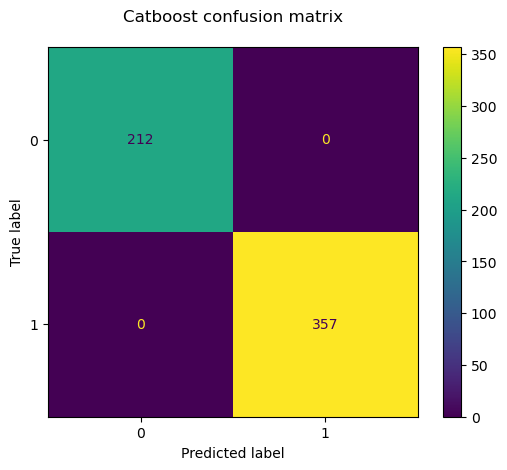

In [101]:
disp = ConfusionMatrixDisplay(cons[-1])
disp.plot()
title('Catboost confusion matrix\n')
show()

End